In [11]:
import utils

In [12]:
import json
import os

dwa = utils.load_data(os.path.abspath("dumped_data"), "zig-zag", "dwa")
tr = utils.load_data(os.path.abspath("dumped_data"), "zig-zag", "tr")
teb = utils.load_data(os.path.abspath("dumped_data"), "zig-zag", "teb")
mpc = utils.load_data(os.path.abspath("dumped_data"), "zig-zag", "mpc")

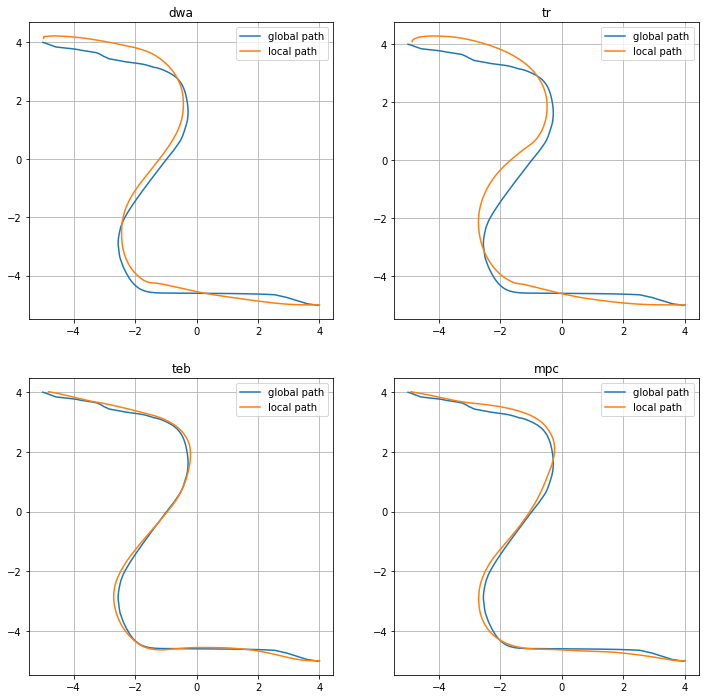

In [13]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 2, figsize=(12, 12))

for i, approach in enumerate([dwa, tr, teb, mpc]):
    ax = axs[i//2][i%2]
    ax.grid(True, "both")
    ax.plot(approach.global_path.x, approach.global_path.y, label="global path")
    ax.plot(approach.local_path.x, approach.local_path.y, label="local path")
    ax.title.set_text(approach.approach_name)
    ax.legend()

plt.show()


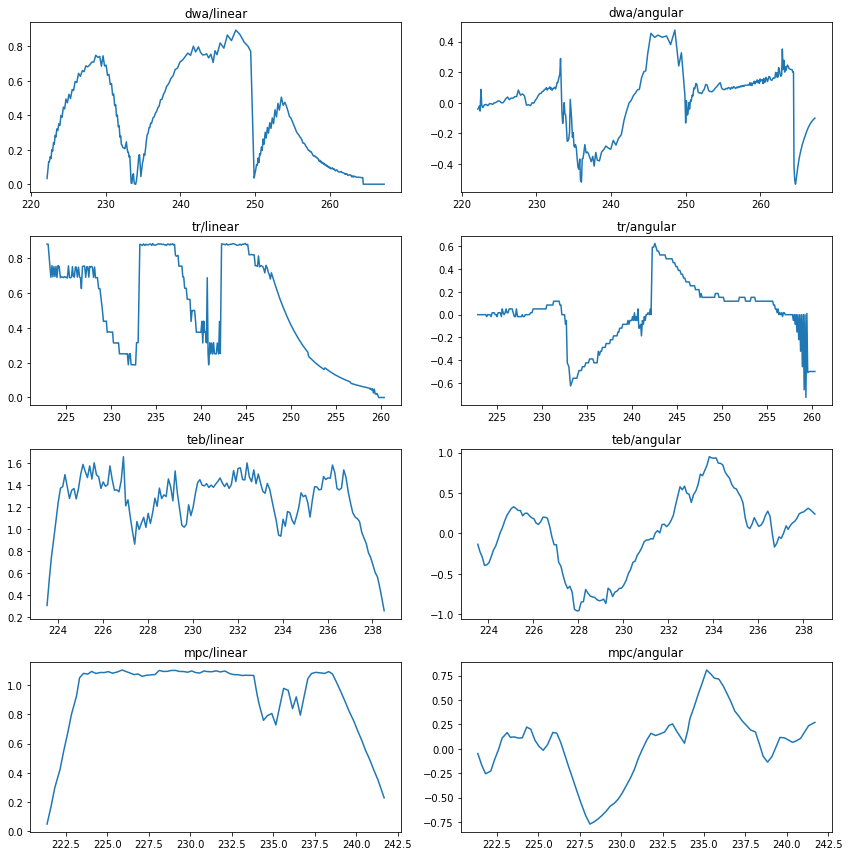

In [14]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(4, 2, figsize=(12, 12))

map(lambda ax: ax.grid(True, "both"), [ax for sublist in axs for ax in sublist])

for i, approach in enumerate([dwa, tr, teb, mpc]):
    axs[i][0].plot(approach.velocity.t, approach.velocity.linear)
    axs[i][1].plot(approach.velocity.t, approach.velocity.angular)
    axs[i][0].title.set_text(f"{approach.approach_name}/linear")
    axs[i][1].title.set_text(f"{approach.approach_name}/angular")

fig.tight_layout()
plt.show()

#### Гладкость скоростей

In [15]:
import pandas as pd

smoothness = {a.approach_name: {"linear": 0, "angular": 0} for a in [dwa, tr, teb, mpc]}
for a, t in [(a, t) for a in [dwa, tr, teb, mpc] for t in ["linear", "angular"]]:
    smoothness[a.approach_name][t] = utils.evaluate_smoothness(a.odom_velocity, "t", t)

smoothness = pd.DataFrame(smoothness).T
smoothness["common"] = smoothness.linear + smoothness.angular
smoothness

,linear,angular,common
dwa,27.673928,23.374183,51.048111
tr,33.382173,26.725864,60.108037
teb,13.714530,11.442779,25.157309
mpc,13.287767,10.831054,24.118821


#### Гладкость пути

In [16]:

{a.approach_name: utils.evaluate_smoothness(a.local_path, "t", "x", "y") for a in [dwa, tr, teb, mpc]}

{'dwa': 1.530428280041366,
 'tr': 1.3794491796347799,
 'teb': 1.01017968912073,
 'mpc': 1.0503160094158646}

#### Отклонение от маршрута

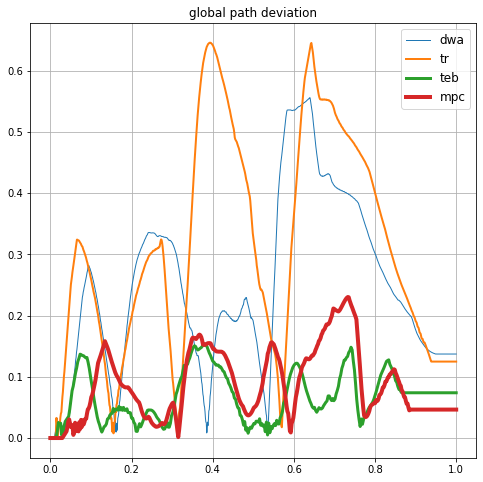

In [22]:
normalize = lambda data: (data - data.min())/(data.max() - data.min())

plt.figure(figsize=(8, 8))
plt.grid(True, "both")
plt.title("global path deviation")
for w, a in enumerate([dwa, tr, teb, mpc], start=1):
    plt.plot(
        normalize(a.global_path_deviation.t),
        a.global_path_deviation.dist,
        linewidth=w, label=f"{a.approach_name}"
    )
plt.legend(fontsize="large")
plt.show()


In [18]:
pd.DataFrame(
    {a.approach_name: a.measured_deviation.__dict__ for a in [dwa, tr, teb,mpc]}
)

,dwa,tr,teb,mpc
absolute,11.861485,12.542341,1.221395,2.106457
relative,0.644985,0.675309,0.065160,0.111843


In [19]:
{a.approach_name: a.travel_time for a in [dwa, tr, teb, mpc]}

{'dwa': 45.18100000000001,
 'tr': 37.46800000000002,
 'teb': 14.994,
 'mpc': 20.333}

In [20]:
{a.approach_name: a.freq for a in [dwa, tr, teb, mpc]}


{'dwa': 9.345794392520942,
 'tr': 9.615384615386002,
 'teb': 10.000000000000568,
 'mpc': 4.024144869215178}